In [1]:
#Hypothesis Testing , T-Testing
#creating random data set of different weights for individuals 
average_weight = [33,34,35,36,32,28,29,30,31,37,36,35,33,34,31,40,24]

In [2]:
from scipy import stats #importing stats package

In [5]:
stats.ttest_1samp(average_weight,35)

Ttest_1sampResult(statistic=-2.354253623010381, pvalue=0.03166804359862131)

In [6]:
#creating an random data set of student in class 11th with each student weight 
average_weight1 = [29,31,28,33,31,34,32,20,32,28,27,26,30,31,34,30]

In [7]:
average_weight #average weight of class 12th student as seen in One-Sample T-Test

[33, 34, 35, 36, 32, 28, 29, 30, 31, 37, 36, 35, 33, 34, 31, 40, 24]

In [8]:
stats.ttest_ind(average_weight,average_weight1)

Ttest_indResult(statistic=2.404544177024533, pvalue=0.022355127034138323)

In [9]:
#let's create random data set of individuals who are suffering from headache & we have given them two medic 
before_metaphor = [68,45,46,34,23,67,80,120,34,54,68] 
after_metaphor = [28,25,26,24,13,37,30,30,54,34,38]

In [10]:
stats.ttest_rel(before_metaphor,after_metaphor)

Ttest_relResult(statistic=3.2771720738937873, pvalue=0.00832867082029929)

# T-Test Example (Bike-Sharing Dataset)

In [11]:
#install researchpy 
!pip install researchpy 
## it combines pandas, scipy.stats and statsmodels to ##get more complete information in a single API call

In [13]:
#import the libraries 
import statsmodels.api as sm 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import scale 
import researchpy as rc 
import warnings
from scipy import stats 
%matplotlib inline

In [14]:
#read the data 
df = pd.read_csv('bike_sharing.csv')

In [15]:
#check the shape 
df.shape

(10886, 12)

In [16]:
#check the head 
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [17]:
#check the information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [18]:
#check the number of null values in each column 
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [19]:
df['atemp'].corr(df['temp']) #atemp and temp are correlated

0.984948110481707

In [20]:
#drop datetime 
df.drop(['datetime','atemp'],axis = 1,inplace=True)

In [21]:
#check the unique values in each column 
df.apply(lambda x : x.nunique())

season          4
holiday         2
workingday      2
weather         4
temp           49
humidity       89
windspeed      28
casual        309
registered    731
count         822
dtype: int64

In [22]:
#standardize all the numerical features 
num_scaled = scale (df[['temp','humidity','windspeed','casual','registered']],copy=False)

In [23]:
#scale takes the difference of each values from the mean and divide by standard deviation 
num_scaled

array([[-1.33366069,  0.99321305, -1.56775367, -0.66099193, -0.94385353],
       [-1.43890721,  0.94124921, -1.56775367, -0.56090822, -0.81805246],
       [-1.43890721,  0.94124921, -1.56775367, -0.62095844, -0.851158  ],
       ...,
       [-0.80742813, -0.04606385,  0.26970368, -0.64097518,  0.05593396],
       [-0.80742813, -0.04606385, -0.83244247, -0.48084125, -0.25525818],
       [-0.91267464,  0.21375537, -0.46560752, -0.64097518, -0.47375478]])

In [24]:
#Let's check the mean of bikes rented on working and non-working days
df.groupby('workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


In [25]:
#create 2 samples one for working days and one for non-working days 
sample_01 = df[df['workingday'] == 1] 
sample_02 = df[df['workingday'] == 0]

In [26]:
#check the shape of both the samples
print(sample_01.shape,sample_02.shape)

(7412, 10) (3474, 10)


In [ ]:
sample_01 have 7412 observations whereas sample_02 only have 3474 obsrvations. 
We have to take equal number of observations in both the sample.

In [27]:
#make equal number of records in each sample 
sample_01 = sample_01.sample(3474) 
print(sample_01.shape,sample_02.shape)

(3474, 10) (3474, 10)


In [ ]:
Before directly jumping for hypothesis testing we have to check for different assumptions related to the kind of hypothesis test we want to perform. 

##Assumption for T-Test 
1. The variances of the 2 samples are equal(We will use Levene's test to check this assumption). 
2. The distrubtion of the residuals b/w the two groups should follow the normal distribution. 
We can plot histogram and see whether the distribution follows the normal distribution or not. We can also plot a Q-Q plot. 
We can check the normality using shapiro-wilks test as well.

In [ ]:
#Levene's test to check whether the variances of the two group are same. 
#H0 : Variances are same. 
#H1 : Variances are not same. 
#Alpha = 0.05% 
#if p-value > alpha (Cannot reject H0) 
#if p-value < alpha (Accept null hypothesis)

In [28]:
alpha = 0.05 
Stats,Pvalue = stats.levene(sample_01['count'],sample_01['count']) 
print(f' Test statistics : {Stats} \n Alpha : {alpha} \n P-value : {Pvalue}') 
if Pvalue > alpha: 
    print(' Variances are same accept null hypothesis ') 
else: 
    print(' Variances are not same reject not null hypothesis ')

 Test statistics : 0.0 
 Alpha : 0.05 
 P-value : 1.0
 Variances are same accept null hypothesis 


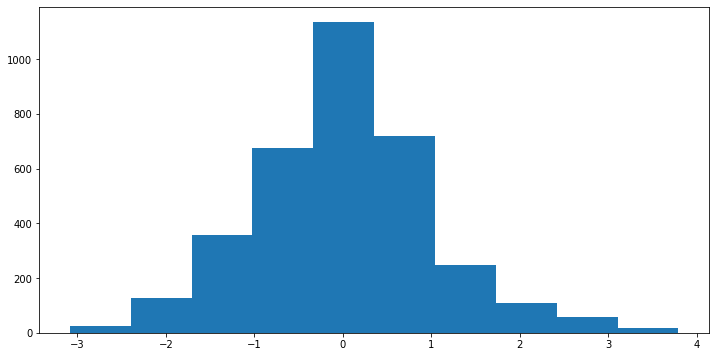

In [29]:
#we will take the difference b/w sample_01 and sample_02 and plot a histogram to check for normality 
#we will scale the difference 
diff = scale((np.array(sample_01['count']) - np.array(sample_02['count']))) 
plt.figure(figsize=(12,6)) 
plt.hist(diff) 
plt.show()

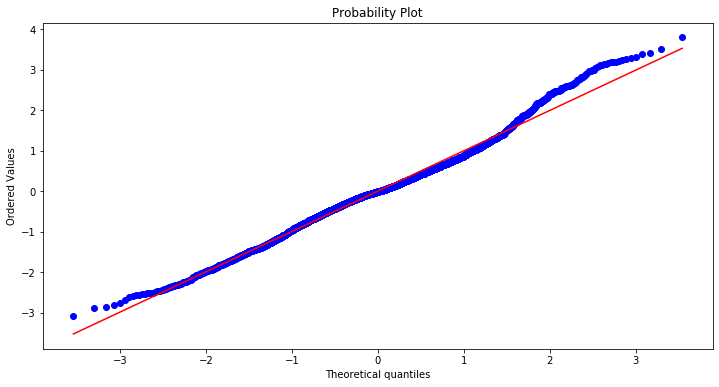

In [30]:
#q-q plot to check the normality 
plt.figure(figsize=(12,6)) 
stats.probplot(diff,plot=plt,dist='norm') 
plt.show()

In [ ]:
#Stastical test for checking normality 
#Shapiro-wilk test 
#H0 : Normally distributed 
#H1 : Not Normally distributed

In [31]:
alpha = 0.05 
statistic,p_value = stats.shapiro(diff) 
if p_value > alpha: 
    print(f'Accept Null Hypothesis p-value : {p_value}') 
else: 
    print(f'Reject Null Hypothesis p-value : {p_value}')

Reject Null Hypothesis p-value : 1.3431059455058987e-15


In [32]:
##Independent Sample T-test
# H0 : There's no difference in mean (Bike rental doesn't depends on workingday) 
# H1 : There's a difference in mean (Bike rental depends on workingday) 
# Alpha : 0.05% 
alpha = 0.05 
statistic , p_value = stats.ttest_ind(sample_01['count'],sample_02['count']) 
if p_value > alpha: 
    print(f'Fail to reject Null Hypothesis p-value is {p_value}') 
else: 
    print('Reject Null Hypothesis')

Fail to reject Null Hypothesis p-value is 0.5318219760637444


In [ ]:
As we can see that the p-value is greater than alpha. So we can't reject our null hypothesis. 
working day has no effect on number of bikes rented.

# Comparing means, Student's t-test, ANOVA 
In this Notebook, we will examine the concept of comparing means between groups of data using Student's t-test and ANOVA.

In [33]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as st 
import seaborn as sns

In [34]:
population_mean = 100 
population_std = 15 
n_sample = 30

In [ ]:
#Generate typical distribution of a Employee at company 'ABC'

In [35]:
avg_class = np.vectorize(int)(np.random.normal(loc=population_mean,scale=population_std,size=n_sample))

In [36]:
print("A typical class I.Q.:",avg_class)

A typical class I.Q.: [106 109  72  84  93  94 110  98 116  88 100  86  97  91 102 106 104  71
 101  82 100  66 103  91 100 116 111 110  86 131]


In [ ]:
#The given class data (generated with the given mean and assumed same variance as population)

In [37]:
given_class = np.vectorize(int)(np.random.normal(loc=112.5,scale=population_std,size=n_sample))

In [38]:
print("Given class I.Q.:",given_class)

Given class I.Q.: [111 106 126 100 100 103 109 115 113 124 128 106 118 117 114  98 108 104
  96 114 122 105 122 119 127 112 131 119 128 100]


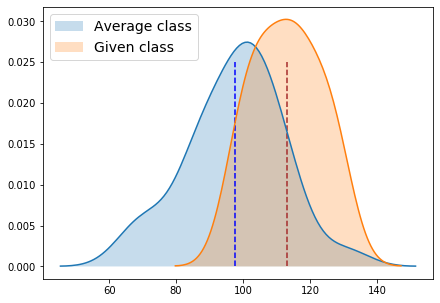

In [39]:
plt.figure(figsize=(7,5)) 
sns.kdeplot(avg_class,shade=True) 
sns.kdeplot(given_class,shade=True) 
plt.legend(['Average class','Given class'],fontsize=14) 
plt.vlines(x=avg_class.mean(),ymin=0,ymax=0.025,color='blue',linestyle='--') 
plt.vlines(x=given_class.mean(),ymin=0,ymax=0.025,color='brown',linestyle='--') 
plt.show()

In [40]:
std_err = population_std/np.sqrt(n_sample) 
z_stat = (given_class.mean()-population_mean)/std_err 
print("Standard error of the mean:",std_err) 
print("Z-statistic:",z_stat)

Standard error of the mean: 2.7386127875258306
Z-statistic: 4.80778689365646


In [41]:
alpha = 0.05 
rejection_threshold = st.norm.ppf(1-alpha)

In [42]:
if z_stat>rejection_threshold: 
    print("We reject the NULL hypothesis. The class I.Q. is indeed above average") 
else:
    print("We cannot reject the NULL hypothesis that class average is same as population average.")

We reject the NULL hypothesis. The class I.Q. is indeed above average


In [43]:
def hypothesis_testing(n_sample=30,population_mean=100,population_std=15,alpha=0.05):
    """ Tests the hypothesis of above average I.Q. and reports the conclusion """
    given_class=np.vectorize(int)(np.random.normal(loc=112.5,scale=population_std,size=n_sample))
    
    std_err = population_std/np.sqrt(n_sample) 
    z_stat = (given_class.mean()-population_mean)/std_err
    
    alpha = 0.05 
    rejection_threshold = st.norm.ppf(1-alpha)
    
    if z_stat>rejection_threshold: 
        print("We reject the NULL hypothesis. The class I.Q. is indeed above average") 
    else:
        print("We cannot reject the NULL hypothesis that class average is same as population average.")

In [44]:
#Test with default values
hypothesis_testing()

We reject the NULL hypothesis. The class I.Q. is indeed above average


In [45]:
#What if the population mean is higher 110?
hypothesis_testing(population_mean=107)

We reject the NULL hypothesis. The class I.Q. is indeed above average


In [46]:
#What if the population standard deviation is lower, say 10? What happens if it is higher instead?
hypothesis_testing(population_std=10)

We reject the NULL hypothesis. The class I.Q. is indeed above average


In [47]:
hypothesis_testing(population_std=40)

We reject the NULL hypothesis. The class I.Q. is indeed above average


In [48]:
#What if there were only 4 employee from ABC company? What if we could test 100 employee instead?
hypothesis_testing(n_sample=4)

We reject the NULL hypothesis. The class I.Q. is indeed above average


In [49]:
hypothesis_testing(n_sample=100)

We reject the NULL hypothesis. The class I.Q. is indeed above average


In [50]:
#What is the impact of changing the significance level to 0.01 (or even 0.001) from 0.05?
hypothesis_testing(alpha=0.01)

We reject the NULL hypothesis. The class I.Q. is indeed above average


In [51]:
hypothesis_testing(alpha=0.001)

We reject the NULL hypothesis. The class I.Q. is indeed above average


# Independent Student's t-test implementation

In [3]:
def independent_ttest(data1, data2, alpha=0.05): 
    """ Student's t-test for independent groups 
    
    Argument: 
        data1: First group data in numpy array format 
        data2: Second group two data in numpy array format 
        alpha: Significance level 
        
    Returns: 
    t_stat: Computed t-statistic 
    df: Degrees of freedom 
    cv: Critical value 
    p: p-value (of NULL hypothesis) """ 
    
    import scipy.stats as st 
    # calculate means 
    mean1, mean2 = np.mean(data1), np.mean(data2) 
    # calculate standard errors 
    se1, se2 = st.sem(data1), st.sem(data2) 
    # standard error on the difference between the samples 
    sed = np.sqrt(se1**2.0 + se2**2.0) 
    # calculate the t statistic 
    t_stat = (mean1 - mean2) / sed 
    # degrees of freedom
    df = len(data1) + len(data2) - 2 
    # calculate the critical value 
    cv = st.t.ppf(1.0 - alpha, df) 
    # calculate the p-value 
    p = (1.0 - st.t.cdf(abs(t_stat), df)) * 2.0 
    # return everything 
    return t_stat, df, cv, p

In [4]:
#Apply the function for testing hypothesis of equal mean
n_sample = 20

In [6]:
import numpy as np
data1 = 5 * np.random.randn(n_sample) + 50 
data2 = 5 * np.random.randn(n_sample) + 51

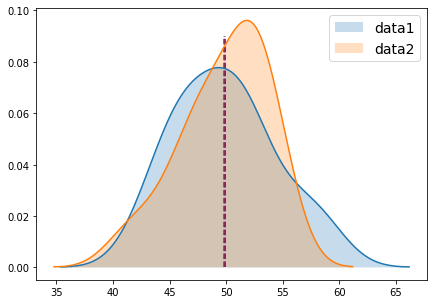

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(7,5)) 
sns.kdeplot(data1,shade=True) 
sns.kdeplot(data2,shade=True) 
plt.legend(['data1','data2'],fontsize=14) 
plt.vlines(x=data1.mean(),ymin=0,ymax=0.09,color='blue',linestyle='--') 
plt.vlines(x=data2.mean(),ymin=0,ymax=0.09,color='brown',linestyle='--') 
plt.show()

In [9]:
# calculate the t test 
alpha = 0.05 
t_stat, df, cv, p = independent_ttest(data1, data2, alpha) 
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p)) 
print()

t=0.038, df=38, cv=1.686, p=0.970



In [10]:
# interpret via critical value 
if abs(t_stat) <= cv: 
    print('Fail to reject null hypothesis that the means are equal.') 
else:
    print('Reject the null hypothesis that the means are equal.')

Fail to reject null hypothesis that the means are equal.


In [11]:
# interpret via p-value 
if p > alpha: 
    print('Fail to reject null hypothesis that the means are equal.') 
else:
    print('Reject the null hypothesis that the means are equal.')

Fail to reject null hypothesis that the means are equal.


In [12]:
n_sample = 200

In [13]:
import numpy as np
data1 = 5 * np.random.randn(n_sample) + 50 
data2 = 5 * np.random.randn(n_sample) + 51

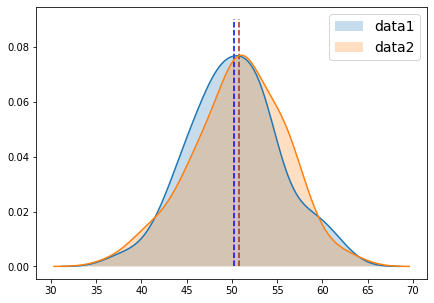

In [14]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(7,5)) 
sns.kdeplot(data1,shade=True) 
sns.kdeplot(data2,shade=True) 
plt.legend(['data1','data2'],fontsize=14) 
plt.vlines(x=data1.mean(),ymin=0,ymax=0.09,color='blue',linestyle='--') 
plt.vlines(x=data2.mean(),ymin=0,ymax=0.09,color='brown',linestyle='--') 
plt.show()

In [15]:
# calculate the t test 
alpha = 0.05 
t_stat, df, cv, p = independent_ttest(data1, data2, alpha) 
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p)) 
print()

t=-0.904, df=398, cv=1.649, p=0.367



In [16]:
# interpret via critical value 
if abs(t_stat) <= cv: 
    print('Fail to reject null hypothesis that the means are equal.') 
else:
    print('Reject the null hypothesis that the means are equal.')

Fail to reject null hypothesis that the means are equal.


In [17]:
# interpret via p-value 
if p > alpha: 
    print('Fail to reject null hypothesis that the means are equal.') 
else:
    print('Reject the null hypothesis that the means are equal.')

Fail to reject null hypothesis that the means are equal.


# ANOVA using Scipy (f_oneway() method)

In [18]:
n_sample = 50

In [19]:
group1 = 5 * np.random.randn(n_sample) + 50 
group2 = 5 * np.random.randn(n_sample) + 52

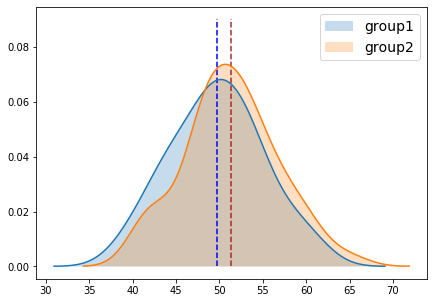

In [21]:
plt.figure(figsize=(7,5) ) 
sns.kdeplot(group1,shade=True) 
sns.kdeplot(group2,shade=True) 
plt.legend(['group1','group2'],fontsize=14) 
plt.vlines(x=group1.mean(),ymin=0,ymax=0.09,color='blue',linestyle='--') 
plt.vlines(x=group2.mean(),ymin=0,ymax=0.09,color='brown',linestyle='--') 
plt.show()

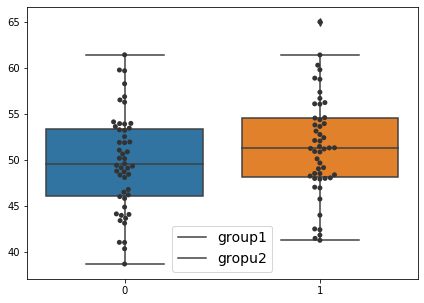

In [22]:
plt.figure(figsize=(7,5)) 
sns.boxplot(data=[group1,group2]) 
sns.swarmplot(data=[group1,group2],color='.2') 
plt.legend(['group1','gropu2'],fontsize=14) 
plt.show()

In [23]:
f,p=st.f_oneway(group1,group2)

NameError: name 'st' is not defined